In [1]:
import pandas as pd
import datetime
import numpy as np
import pandas_datareader.data as web
from pandas import Series, DataFrame


start = datetime.datetime(2019, 1, 1)
end = datetime.datetime(2020, 5, 1)

df = web.DataReader("AAPL", 'yahoo', start, end)
df.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,158.850006,154.229996,154.889999,157.919998,37039700.0,155.214005
2019-01-03,145.720001,142.000000,143.979996,142.190002,91312200.0,139.753540
2019-01-04,148.550003,143.800003,144.529999,148.259995,58607100.0,145.719513
2019-01-07,148.830002,145.899994,148.699997,147.929993,54777800.0,145.395203
2019-01-08,151.820007,148.520004,149.559998,150.750000,41025300.0,148.166870
2019-01-09,154.529999,149.630005,151.289993,153.309998,45099100.0,150.682983
2019-01-10,153.970001,150.860001,152.500000,153.800003,35780700.0,151.164627
2019-01-11,153.699997,151.509995,152.880005,152.289993,27023200.0,149.680466
2019-01-14,151.270004,149.220001,150.850006,150.000000,32439200.0,147.429718


In [2]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [3]:
price_data = df[['High','Low','Open','Close','Volume','Adj Close']]


# calculate the change in price
price_data['change_in_price'] = price_data['Adj Close'].diff()

In [4]:
price_data.isnull().sum()

High               0
Low                0
Open               0
Close              0
Volume             0
Adj Close          0
change_in_price    1
dtype: int64

In [5]:
price_data.head(10)

,High,Low,Open,Close,Volume,Adj Close,change_in_price
Date,,,,,,,
2019-01-02,158.850006,154.229996,154.889999,157.919998,37039700.0,155.214005,NaN
2019-01-03,145.720001,142.000000,143.979996,142.190002,91312200.0,139.753540,-15.460464
2019-01-04,148.550003,143.800003,144.529999,148.259995,58607100.0,145.719513,5.965973
2019-01-07,148.830002,145.899994,148.699997,147.929993,54777800.0,145.395203,-0.324310
2019-01-08,151.820007,148.520004,149.559998,150.750000,41025300.0,148.166870,2.771667
2019-01-09,154.529999,149.630005,151.289993,153.309998,45099100.0,150.682983,2.516113
2019-01-10,153.970001,150.860001,152.500000,153.800003,35780700.0,151.164627,0.481644
2019-01-11,153.699997,151.509995,152.880005,152.289993,27023200.0,149.680466,-1.484161
2019-01-14,151.270004,149.220001,150.850006,150.000000,32439200.0,147.429718,-2.250748


In [6]:
up_df, down_df = price_data[['change_in_price']].copy(), price_data[['change_in_price']].copy()

# For up days, if the change is less than 0 set to 0.
up_df.loc['change_in_price'] = up_df.loc[(up_df['change_in_price'] < 0), 'change_in_price'] = 0

# For down days, if the change is greater than 0 set to 0.
down_df.loc['change_in_price'] = down_df.loc[(down_df['change_in_price'] > 0), 'change_in_price'] = 0

# We need change in price to be absolute.
down_df['change_in_price'] = down_df['change_in_price'].abs()

In [7]:
price_data['down_days'] = down_df['change_in_price']
price_data['up_days'] = up_df['change_in_price']

In [8]:
price_data

,High,Low,Open,Close,Volume,Adj Close,change_in_price,down_days,up_days
Date,,,,,,,,,
2019-01-02,158.850006,154.229996,154.889999,157.919998,37039700.0,155.214005,NaN,NaN,NaN
2019-01-03,145.720001,142.000000,143.979996,142.190002,91312200.0,139.753540,-15.460464,15.460464,0.000000
2019-01-04,148.550003,143.800003,144.529999,148.259995,58607100.0,145.719513,5.965973,0.000000,5.965973
2019-01-07,148.830002,145.899994,148.699997,147.929993,54777800.0,145.395203,-0.324310,0.324310,0.000000
2019-01-08,151.820007,148.520004,149.559998,150.750000,41025300.0,148.166870,2.771667,0.000000,2.771667
...,...,...,...,...,...,...,...,...,...
2020-04-27,284.540009,279.950012,281.799988,283.170013,29271900.0,283.170013,0.200012,0.000000,0.200012
2020-04-28,285.829987,278.200012,285.079987,278.579987,28001200.0,278.579987,-4.590027,4.590027,0.000000
2020-04-29,289.670013,283.890015,284.730011,287.730011,34320200.0,287.730011,9.150024,0.000000,9.150024


In [9]:
# We need to remove all rows that have an NaN value.
print('Before NaN Drop we have {} rows and {} columns'.format(price_data.shape[0], price_data.shape[1]))

# Any row that has a `NaN` value will be dropped.
price_data = price_data.dropna()

# Display how much we have left now.
print('After NaN Drop we have {} rows and {} columns'.format(price_data.shape[0], price_data.shape[1]))

# Print the head.
price_data.head()

Before NaN Drop we have 336 rows and 9 columns
After NaN Drop we have 335 rows and 9 columns


,High,Low,Open,Close,Volume,Adj Close,change_in_price,down_days,up_days
Date,,,,,,,,,
2019-01-03,145.720001,142.000000,143.979996,142.190002,91312200.0,139.753540,-15.460464,15.460464,0.000000
2019-01-04,148.550003,143.800003,144.529999,148.259995,58607100.0,145.719513,5.965973,0.000000,5.965973
2019-01-07,148.830002,145.899994,148.699997,147.929993,54777800.0,145.395203,-0.324310,0.324310,0.000000
2019-01-08,151.820007,148.520004,149.559998,150.750000,41025300.0,148.166870,2.771667,0.000000,2.771667
2019-01-09,154.529999,149.630005,151.289993,153.309998,45099100.0,150.682983,2.516113,0.000000,2.516113


In [10]:
# Add a new column named 'Prediction' 
price_data['Prediction'] = [0 if x < 0 else 1 for x in price_data['change_in_price']] 

C:\Users\adibc\Anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
price_data.head(30)

,High,Low,Open,Close,Volume,Adj Close,change_in_price,down_days,up_days,Prediction
Date,,,,,,,,,,
2019-01-03,145.720001,142.000000,143.979996,142.190002,91312200.0,139.753540,-15.460464,15.460464,0.000000,0
2019-01-04,148.550003,143.800003,144.529999,148.259995,58607100.0,145.719513,5.965973,0.000000,5.965973,1
2019-01-07,148.830002,145.899994,148.699997,147.929993,54777800.0,145.395203,-0.324310,0.324310,0.000000,0
2019-01-08,151.820007,148.520004,149.559998,150.750000,41025300.0,148.166870,2.771667,0.000000,2.771667,1
2019-01-09,154.529999,149.630005,151.289993,153.309998,45099100.0,150.682983,2.516113,0.000000,2.516113,1
2019-01-10,153.970001,150.860001,152.500000,153.800003,35780700.0,151.164627,0.481644,0.000000,0.481644,1
2019-01-11,153.699997,151.509995,152.880005,152.289993,27023200.0,149.680466,-1.484161,1.484161,0.000000,0
2019-01-14,151.270004,149.220001,150.850006,150.000000,32439200.0,147.429718,-2.250748,2.250748,0.000000,0
2019-01-15,153.389999,150.050003,150.270004,153.070007,28710900.0,150.447128,3.017410,0.000000,3.017410,1


In [12]:
X_Cols = price_data[['High','Low','Open','Close','Volume','Adj Close','change_in_price', 'down_days', 'up_days']]
Y_Cols = price_data['Prediction']

X_train, X_test, y_train, y_test = train_test_split(X_Cols, Y_Cols, random_state = 0)

# Create a random forest Classifier
r_f_c = RandomForestClassifier(n_estimators = 100, oob_score = True, criterion = 'gini', random_state = 0)

# Fitting the model
r_f_c.fit(X_train, y_train)

# Make predictions
y_pred = r_f_c.predict(X_test)

In [13]:
# Print the accuracy of the model 
print('Correct Prediction (%):', accuracy_score(y_test, y_pred, normalize = True) * 100.0)

Correct Prediction (%): 100.0


In [14]:
#Checking Count of each value
positive_true_count = len(price_data.loc[price_data['Prediction'] == 1])
negative_true_count = len(price_data.loc[price_data['Prediction'] == 0])

In [15]:
#Get true count of positive and Negative
(positive_true_count, negative_true_count)

(186, 149)

# Classification Report

In [16]:
# Define the traget names
target_names = ['Down Day', 'Up Day']

# Build a classifcation report
report = classification_report(y_true = y_test, y_pred = y_pred, target_names = target_names, output_dict = True)

# Add it to a data frame, transpose it for readability.
report_df = pd.DataFrame(report).transpose()
report_df

,precision,recall,f1-score,support
Down Day,1.0,1.0,1.0,41.0
Up Day,1.0,1.0,1.0,43.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,84.0
weighted avg,1.0,1.0,1.0,84.0


# Calculating Feature Importance and Graphing

In [17]:
# Calculate feature importance and store in pandas series
feature_imp = pd.Series(r_f_c.feature_importances_, index=X_Cols.columns).sort_values(ascending=False)
feature_imp

change_in_price    0.380303
down_days          0.318432
up_days            0.280789
Volume             0.012006
Adj Close          0.002780
Close              0.002331
Open               0.002173
High               0.000812
Low                0.000373
dtype: float64

In [18]:
import matplotlib.pyplot as plt

imp_featuredf = pd.DataFrame(feature_imp)
imp_featuredf

,0
change_in_price,0.380303
down_days,0.318432
up_days,0.280789
Volume,0.012006
Adj Close,0.002780
Close,0.002331
Open,0.002173
High,0.000812
Low,0.000373


In [19]:
imp_featuredf['Features']=imp_featuredf.index
maindf = imp_featuredf.reset_index(drop=True)

In [20]:
maindf.rename(columns={0: "Percentage"})

,Percentage,Features
0,0.380303,change_in_price
1,0.318432,down_days
2,0.280789,up_days
3,0.012006,Volume
4,0.002780,Adj Close
5,0.002331,Close
6,0.002173,Open
7,0.000812,High
8,0.000373,Low


In [21]:
maindf.set_index('Features', inplace=True)

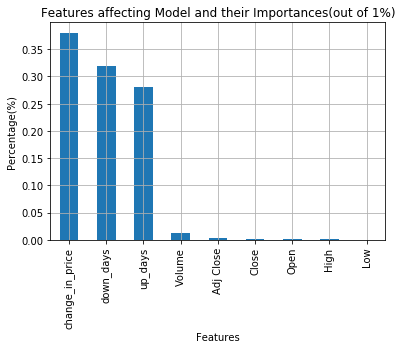

In [22]:
maindf.plot(kind='bar',legend=None)
plt.title("Features affecting Model and their Importances(out of 1%)")
plt.xlabel('Features')
plt.ylabel('Percentage(%)')
plt.grid()
plt.savefig("FeaturesAndImp.png")
plt.show()